# Problem 1

In [108]:
import pandas as pd
df = pd.read_csv('benchmarks.txt', sep=",",header=0)


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
from datetime import date 

def dt(x):
    try:
        date_string = x.split('-')[1]
        if len(list(date_string)) == 6:
            date_string = '19' + date_string
        now = date(*map(int, [date_string[:4], date_string[4:6], date_string[6:]]))
        return now
    except:
        return 'n/a'

In [114]:
df['Date'] = df.testID.apply(dt)
df = df[df.Date != 'n/a']
df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,testID,benchName,base,peak,Date
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,1999-01-04
1,cpu95-19990104-03254,102.swim,27.20,34.8,1999-01-04
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,1999-01-04
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,1999-01-04
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,1999-01-04
...,...,...,...,...,...
136990,cpu2006-20120102-19319,462.libquantum,418.00,418,2012-01-02
136991,cpu2006-20120102-19319,464.h264ref,46.10,50.1,2012-01-02
136992,cpu2006-20120102-19319,471.omnetpp,19.10,20.2,2012-01-02
136993,cpu2006-20120102-19319,473.astar,21.10,21.1,2012-01-02


In [115]:
first_date = min(df.Date)
df['time'] = df.Date.apply(lambda x: (x-first_date).days/365)
df

,testID,benchName,base,peak,Date,time
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,1999-01-04,2.928767
1,cpu95-19990104-03254,102.swim,27.20,34.8,1999-01-04,2.928767
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,1999-01-04,2.928767
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,1999-01-04,2.928767
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,1999-01-04,2.928767
...,...,...,...,...,...,...
136990,cpu2006-20120102-19319,462.libquantum,418.00,418,2012-01-02,15.931507
136991,cpu2006-20120102-19319,464.h264ref,46.10,50.1,2012-01-02,15.931507
136992,cpu2006-20120102-19319,471.omnetpp,19.10,20.2,2012-01-02,15.931507
136993,cpu2006-20120102-19319,473.astar,21.10,21.1,2012-01-02,15.931507


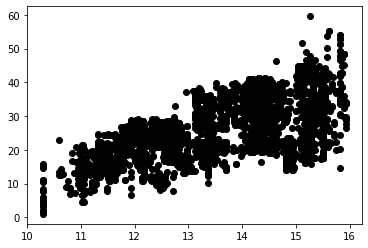

In [116]:
from collections import Counter
most_popular = max(Counter(df.benchName))
df = df[df.benchName == most_popular]
import matplotlib.pyplot as plt
plt.scatter(df.time, df.base,  color='black')
plt.show()

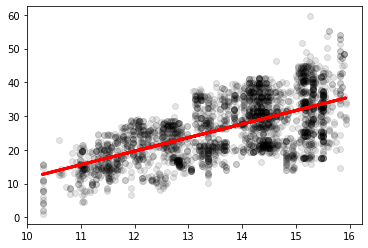

In [141]:
from sklearn import datasets, linear_model, metrics, model_selection

regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.1)
# Train the model using the training sets
# x = np.array().reshape(-1,1)
# y = np.array(df['base']).reshape(-1,1)
regr.fit(X_train,y_train)
predict = regr.predict(X_test)

plt.scatter(X_train,y_train,  color='black', alpha = 0.1)

plt.plot(X_test,predict, linewidth = 3, color = 'red')

# plt.xticks(())
# plt.yticks(())


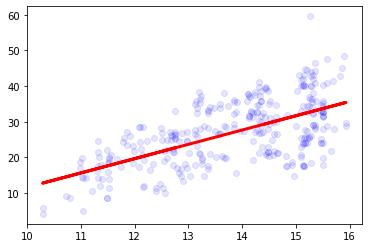

In [140]:
plt.scatter(X_test,y_test,  color='blue', alpha = 0.1)
plt.plot(X_test,predict, linewidth = 3, color = 'red')

In [72]:
type(date[0])

numpy.ndarray

# Problem 2

In [42]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()


array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [23]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-3], digits.target[:-3]) #train the clf

SVC(C=100.0, gamma=0.001)

In [30]:
#predict the last 3 data
#note that the input must be 2-D so digits.data[-1] does not work as it is 1D
clf.predict(digits.data[-3:]) 


array([8, 9, 8])

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        55

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109


Confusion matrix:
[[54  0]
 [ 0 55]]


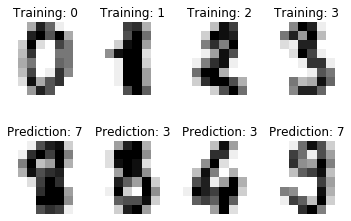

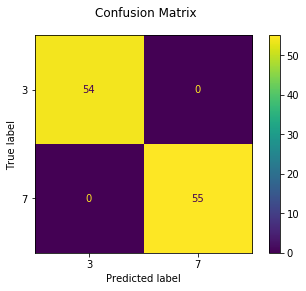

In [59]:
#K-nearest neigbor
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

#filter 3 and 7 data

mask = [label==3 or label==7 for label in digits.target] 
X = data[mask]


# Split data into train and test subsets


y = digits.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()